In [1]:
import networkx as nx
from nxpd import draw, nxpdParams
import itertools as it
from networkx.algorithms import bipartite
import planarity
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import pygraphviz as pgv
from IPython.display import SVG

import svgutils.transform as sg
import sys

startInstantTime = time.time()

In [2]:
#Program's running parameters
inputFilename = "./Input/Input.txt"

greenRGBColor = (35, 155, 86)
redRGBColor = (176, 58, 46)

In [3]:
def printColouredText(text, foregroundColor = (0, 0, 0), backgroundColor = (255, 255, 255)):
    return "\033[48;2;{};{};{}m\033[38;2;{};{};{}m{}\033[38;2;0;0;0m\033[48;2;255;255;255m".format(backgroundColor[0], backgroundColor[1], backgroundColor[2], foregroundColor[0], foregroundColor[1], foregroundColor[2], text)

def addEdgeInUndirectedGraph(graph, initialNode, finalNode, cost = 1.0):
    if initialNode not in graph:
        graph[initialNode] = {}
    graph[initialNode][finalNode] = cost
    if finalNode not in graph:
        graph[finalNode] = {}
    graph[finalNode][initialNode] = cost

"""
def verificarSiGrafoEsBipartito(grafo, nodesList):
    color = {}
    for each_node in nodesList:
       #if not visited already
        if each_node not in color.keys():
            neighbors = [each_node]
            next_neighbors = []
            curr_color = True
            while neighbors:
                out = neighbors.pop(0)
                if out in color.keys():
                    #Check if current color is intended color
                    if color[out] != curr_color:
                        return False
                else:
                    color[out] = curr_color
                    for i in grafo[out]:
                        next_neighbors.append(i)
                if neighbors == []:
                    curr_color = not curr_color
                    neighbors, next_neighbors = next_neighbors, neighbors
    return True
"""

'\ndef verificarSiGrafoEsBipartito(grafo, nodesList):\n    color = {}\n    for each_node in nodesList:\n       #if not visited already\n        if each_node not in color.keys():\n            neighbors = [each_node]\n            next_neighbors = []\n            curr_color = True\n            while neighbors:\n                out = neighbors.pop(0)\n                if out in color.keys():\n                    #Check if current color is intended color\n                    if color[out] != curr_color:\n                        return False\n                else:\n                    color[out] = curr_color\n                    for i in grafo[out]:\n                        next_neighbors.append(i)\n                if neighbors == []:\n                    curr_color = not curr_color\n                    neighbors, next_neighbors = next_neighbors, neighbors\n    return True\n'

In [4]:
graph = {}
nodesList = []

inputStream = open(inputFilename, "r")
for textLine in inputStream.readlines():
    collectedNodes = textLine.strip().split(" - ")
    addEdgeInUndirectedGraph(graph, collectedNodes[0].strip(), collectedNodes[1].strip())
    
    #The graph's nodes list is updated also
    if collectedNodes[0].strip() not in nodesList:
        nodesList.append(collectedNodes[0].strip())
    if collectedNodes[1].strip() not in nodesList:
        nodesList.append(collectedNodes[1].strip())

nodesList.sort()
print(nodesList)

['Account', 'AccountActivation', 'AccountInEarlyChurn', 'AccountInWinback', 'ActivationsGoalAgreement', 'AdherenceFeePayment', 'BaseCommissionAgreement', 'BonusByRecurrentPaymentAgreement', 'BonusByZoneAgreement', 'Canton', 'CommissionDiscount', 'CommissionLiquidation', 'Country', 'Customer', 'Department', 'Location', 'MasterDealer', 'Municipality', 'Parish', 'PenaltyDetail', 'Plan', 'Province', 'RecurrentPaymentSignUp', 'Sale']


-4.0 1734.37 -734.0 4.0
{'xmlns': 'http://www.w3.org/2000/svg', 'xmlns:xlink': 'http://www.w3.org/1999/xlink', 'width': '2897pt', 'height': '1230pt', 'viewbox': '0.00 0.00 1738.37 738.00'}


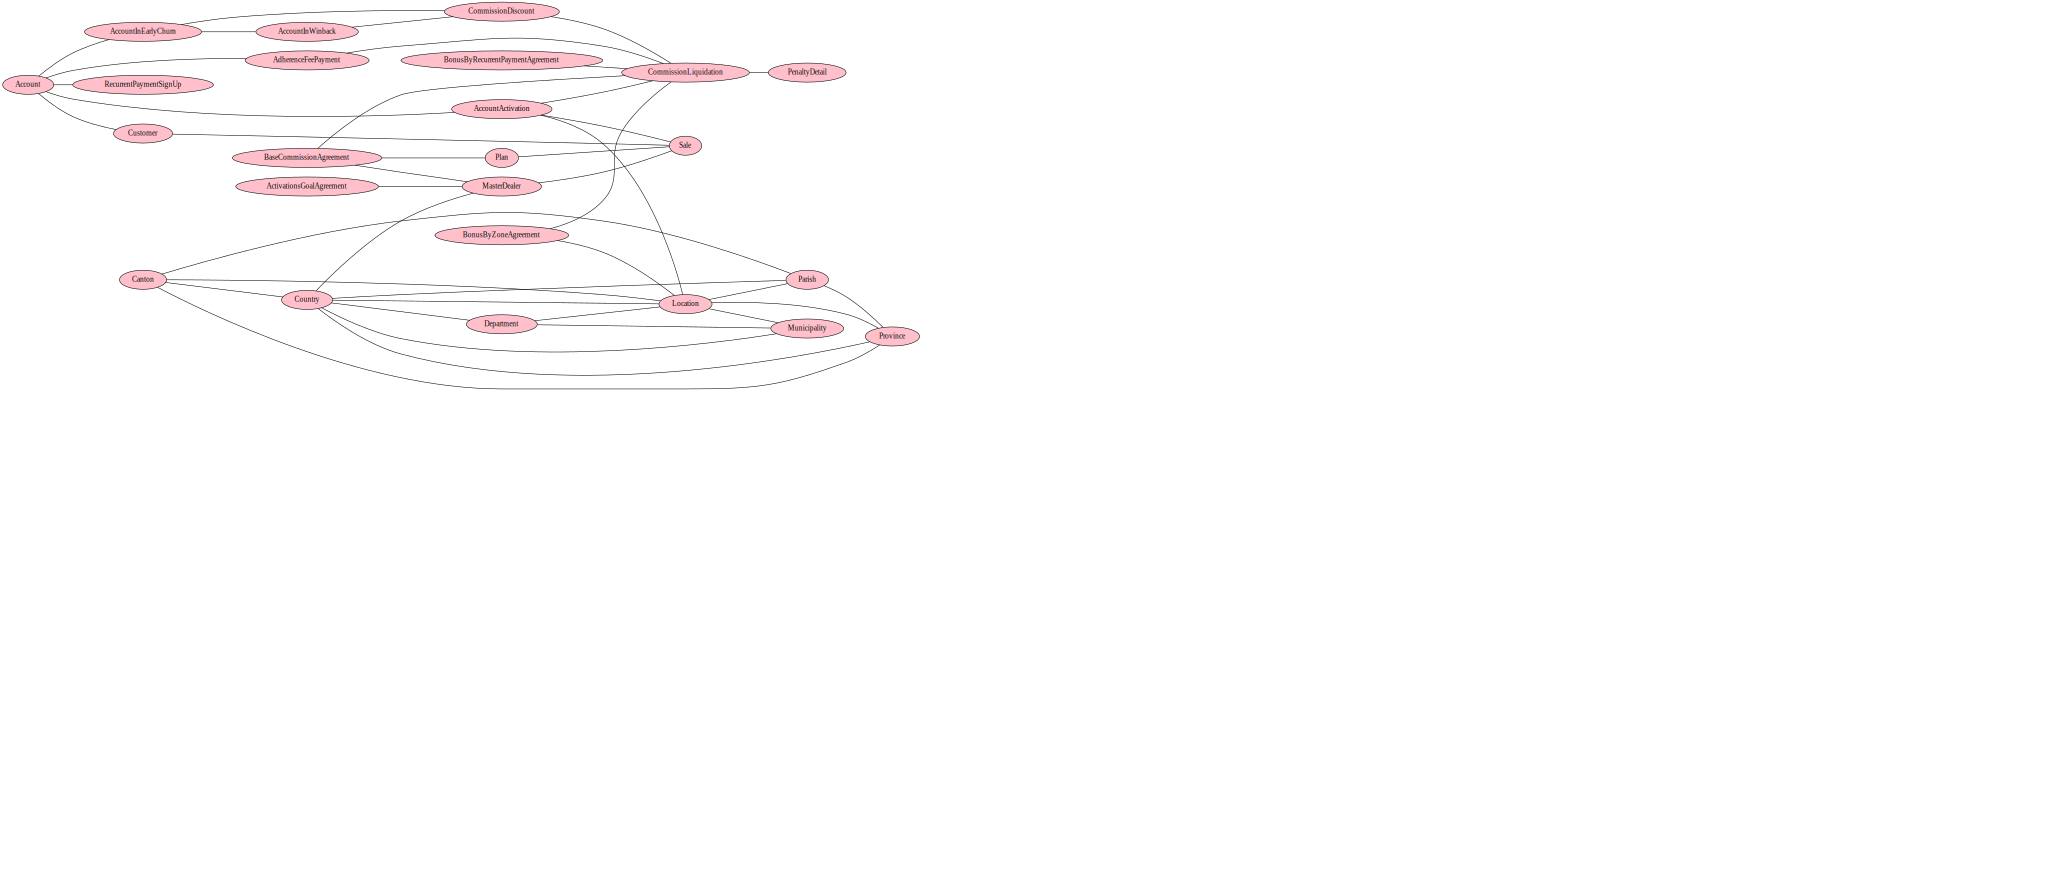

In [5]:
networkxGraph = nx.Graph()
networkxGraph.graph['rankdir'] = 'LR'
networkxGraph.graph['dpi'] = 120

for node in nodesList:
    networkxGraph.add_node(node, color = "black", style = "filled", fillcolor = "pink")

for initialNode in graph:
    for finalNode in graph[initialNode]:
        networkxGraph.add_edge(initialNode, finalNode, weight = graph[initialNode][finalNode])

#G.add_node(0, color='red', style='filled', fillcolor='pink')
#G.add_node(1, shape='square')
#G.add_node(3, style='filled', fillcolor='#00ffff')
#G.add_edge(0, 1, color='red', style='dashed')
#G.add_edge(3, 3, label='a')

#plt.figure(num = 1, figsize = (15, 14))
kkk = draw(networkxGraph, show = 'vector')
#plt.plot(kkk)
#plt.show()


#import random

#G = nx.Graph()
#G.add_nodes_from([1,2])
#G.add_edge(1, 2, weight=random.randint(1, 10))

#draw(G, show='ipynb')


"""
for initialNode in graph:
    for finalNode in graph[initialNode]:
        networkxGraph.add_edge(initialNode, finalNode, weight = graph[initialNode][finalNode])

avail_font_names = [f.name for f in mpl.font_manager.fontManager.ttflist]
print(avail_font_names)

plt.figure(num = 1, figsize = (15, 14))
nx.draw(networkxGraph, with_labels = True, node_size = [len(v) * 100 for v in nodesList], font_family = "Sawasdee" , font_size = 13)
plt.show()
"""


#fig = sg.fromfile('myimage.svg')
fig = kkk.create_svg()
#fig.set_size(('200','200'))




#fig.save("./Output/originalGraph.svg")




from IPython.display import SVG
from bs4 import BeautifulSoup
import re


def save_svg(svg_object):
    soup = BeautifulSoup(svg_object.data, 'lxml')
    svg_elt = soup.find("svg")
    
    #print(svg_elt.attrs)
    
    """
    w = svg_elt.attrs["width"].rstrip("pt")
    h = svg_elt.attrs["height"].rstrip("pt")

    ws = float(w) * scale
    hs = float(h) * scale

    svg_elt.attrs["width"] = f"{ws}pt"
    svg_elt.attrs["height"] = f"{hs}pt"
    svg_elt.attrs["viewbox"] = f"0.00 0.00 {ws} {hs}"

    g_elt = svg_elt.find("g")
    tf = g_elt.attrs["transform"]
    # non-greedy regex-search-and-replace
    tf2 = re.sub(
        "scale\(.*?\)",
        f"scale({scale} {scale})",
        tf
    )
    g_elt.attrs["transform"] = tf2
    """

    svg_object.data = str(svg_elt)
    
    try:
        file_handle = open("./Output/originalGraph.svg", "w")
    except IOError as e:
        print(str(e))
        exit(1)

    file_handle.write(str(svg_elt))
    file_handle.close()

def scale_svg(svg_object, scale = 1.0):
    soup = BeautifulSoup(svg_object.data, 'lxml')
    svg_elt = soup.find("svg")
    
    print(svg_elt.attrs)
    
    w = svg_elt.attrs["width"].rstrip("pt")
    h = svg_elt.attrs["height"].rstrip("pt")

    ws = float(w) * scale
    hs = float(h) * scale

    svg_elt.attrs["width"] = f"{ws}pt"
    svg_elt.attrs["height"] = f"{hs}pt"
    svg_elt.attrs["viewbox"] = f"0.00 0.00 {ws} {hs}"

    g_elt = svg_elt.find("g")
    tf = g_elt.attrs["transform"]
    # non-greedy regex-search-and-replace
    tf2 = re.sub(
        "scale\(.*?\)",
        f"scale({scale} {scale})",
        tf
    )
    g_elt.attrs["transform"] = tf2

    svg_object.data = str(svg_elt)
    
    return svg_object


from svgpathtools import svg2paths

def get_bbox(svg_file):
    paths, _ = svg2paths(svg_file)

    for i, path in enumerate(paths):
        if i == 0:
            # Initialise the overall min-max with the first path
            xmin, xmax, ymin, ymax = path.bbox()
        else:
            # Expand bounds to match path bounds if needed
            p_xmin, p_xmax, p_ymin, p_ymax = path.bbox()
            xmin = p_xmin if p_xmin < xmin else xmin
            xmax = p_xmax if p_xmax > xmax else xmax
            ymin = p_ymin if p_ymin < ymin else ymin
            ymax = p_ymax if p_ymax > ymax else ymax
    
    print(xmin, xmax, ymin, ymax)

save_svg(SVG(fig))
get_bbox("./Output/originalGraph.svg")



#bbox = fig.getBBox();
#viewBox = [bbox.x, bbox.y, bbox.width, bbox.height].join(" ");
#fig.setAttribute("viewBox", viewBox);
#SVG(fig)
#prompt("Copy to clipboard: Ctrl+C, Enter", svg.outerHTML);


scale_svg(SVG(fig), 1.0)

#SVG(fig)

# treat the DOT output as an image file
#sio = io.BytesIO()
#sio.write(png_str)
#sio.seek(0)
#img = mpimg.imread(sio)

# plot the image
#imgplot = plt.imshow(img, aspect='equal')
#plt.show()

False
Graph with 6 nodes and 11 edges


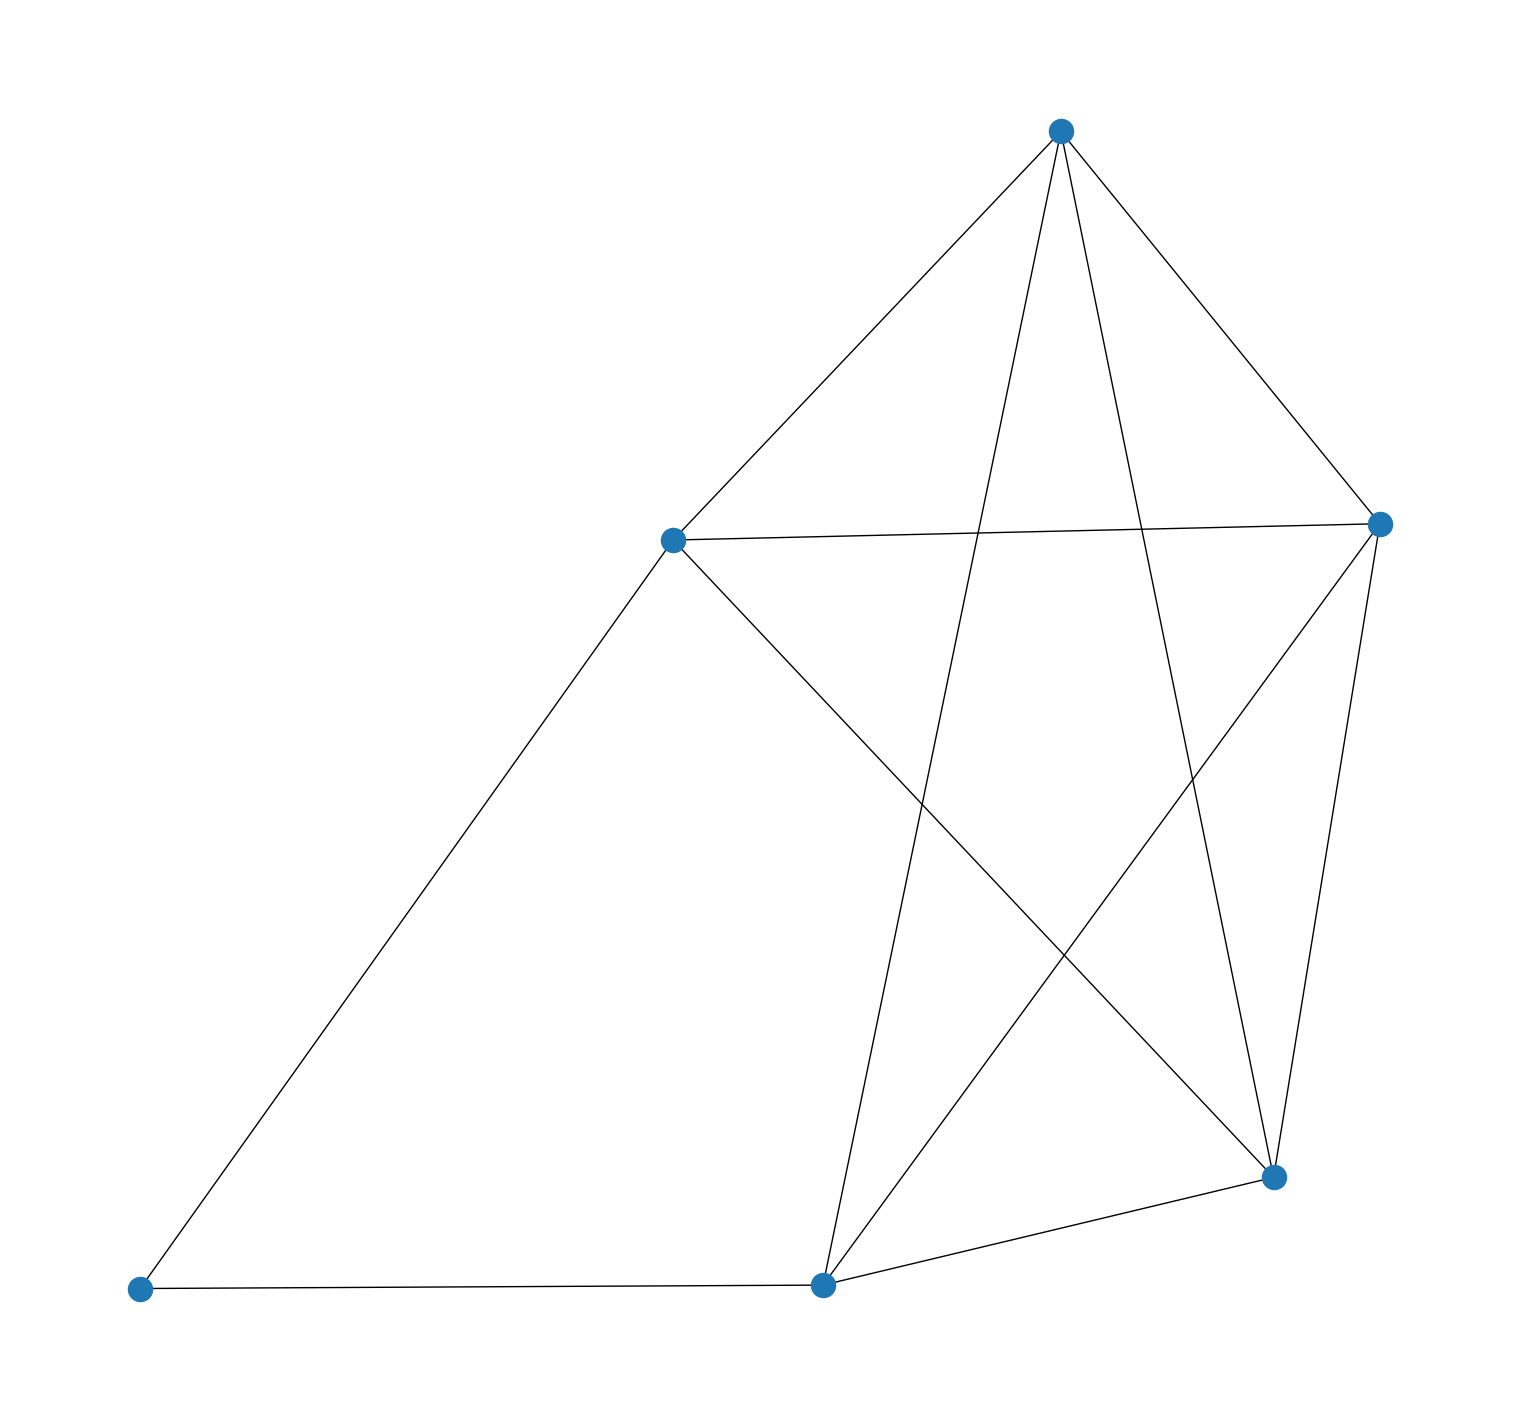

In [6]:
is_planar, P = nx.check_planarity(networkxGraph, counterexample = True)
print(is_planar)
print(P)

plt.figure(num = 2, figsize = (15, 14))
nx.draw(P)
plt.show()

In [7]:
print(planarity.is_planar(networkxGraph)) # False

# find forbidden Kuratowski subgraph
K = planarity.kuratowski_subgraph(networkxGraph)

print(K) # K5 edges

False
Graph with 9 nodes and 14 edges


Eliminando 1 eje(s)
(('Canton', 'Location'),) Graph with 24 nodes and 39 edges


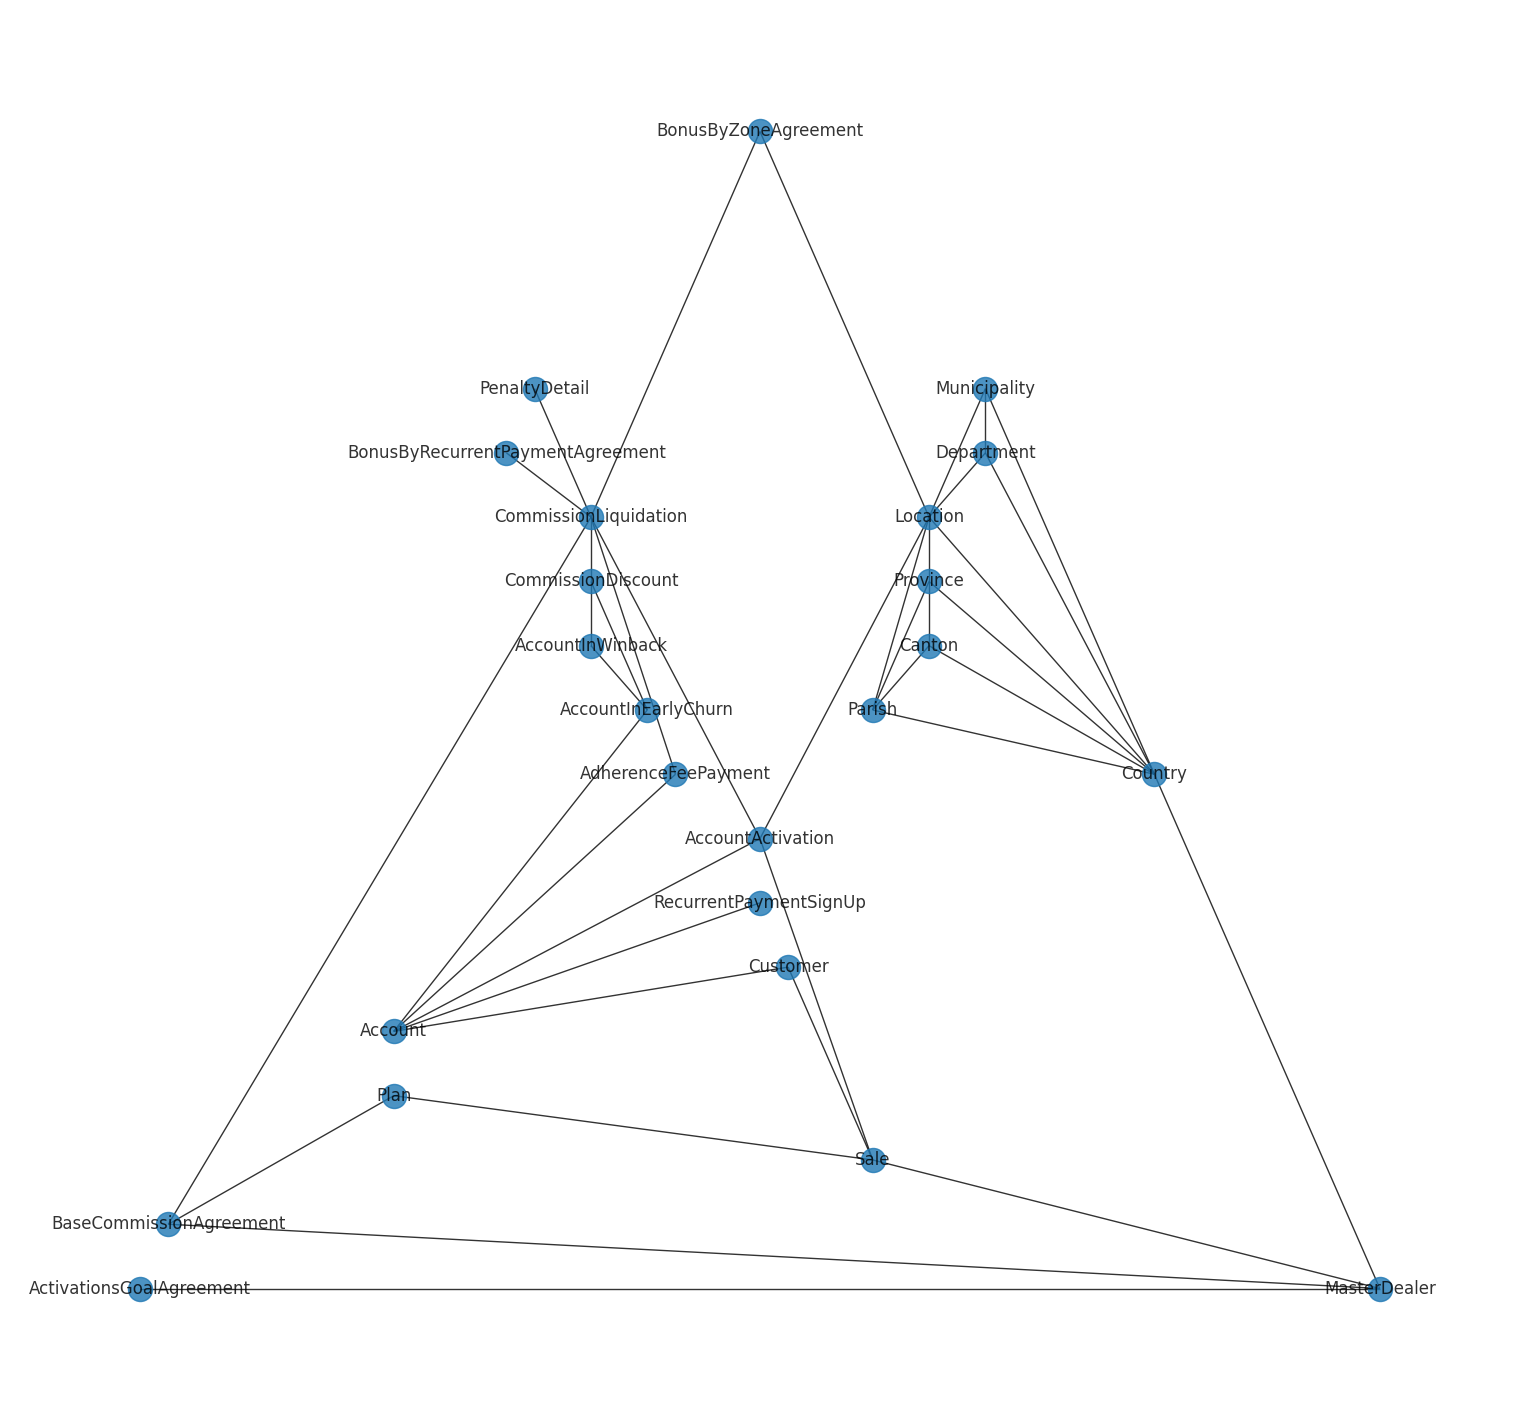

In [8]:
numeroEjes = len(networkxGraph.edges())
found = False
for i in range(1, numeroEjes):
    if found == True:
        break
    print("Eliminando", i, "eje(s)")
    for subEdgesList in it.combinations(networkxGraph.edges(), i):
        grafoNuevo = networkxGraph.copy()
        for edge in subEdgesList:
            grafoNuevo.remove_edge(edge[0], edge[1])
        esSubgrafoPlanar = planarity.is_planar(grafoNuevo)
        if esSubgrafoPlanar == True:
            print(subEdgesList, grafoNuevo)
            plt.figure(num = 3, figsize = (15, 14))
            nx.draw_planar(grafoNuevo, with_labels = True, alpha = 0.8)
            plt.show()
            found = True
            break

In [9]:
outputStream = open(nombreArchivoSalida, "w")
outputStream.write(str(numeroVerticesAlto) + "\n")
outputStream.write(str(numeroVerticesAncho) + "\n")
outputStream.write(informacionGrafoMalla)
outputStream.close()
print("Se ha generado el archivo", printColouredText(nombreArchivoSalida, colorTextoVerde), "que contiene la información del grafo generado")

endInstantTime = time.time()
fullRunningTime = endInstantTime - startInstantTime
runningTimeInMinutes = int(fullRunningTime / 60)
runningTimeInSeconds = int(fullRunningTime % 60)
print("Tiempo de Ejecución: {} minuto(s) y {} segundo(s)".format(runningTimeInMinutes, runningTimeInSeconds))

NameError: name 'nombreArchivoSalida' is not defined